##HW ##
04/24/15

In [1]:
%pylab inline
from scipy.stats import norm, chisquare, pareto, beta
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
housefly_wings = [36,37,38,38,39,39,40,40,40,40,41,41,41,41,41,41,42,42,42,42,42,42,42,43,43,43,43,43,43,43,43,44,44,44,44,44,44,
         44,44,44,45,45,45,45,45,45,45,45,45,45,46,46,46,46,46,46,46,46,46,46,47,47,47,47,47,47,47,47,47,48,48,48,48,48,
         48,48,48,49,49,49,49,49,49,49,50,50,50,50,50,50,51,51,51,51,52,52,53,53,54,55]

normalized_wings = (housefly_wings - mean(housefly_wings))/std(housefly_wings)
N = len(normalized_wings)

In [3]:
boundaries = linspace(min(normalized_wings),max(normalized_wings),N)
bins = zip(boundaries[:-1], boundaries[1:])

probability_of_bin = []
expected_count = []
actual_count = []
diffs = []
chi_square = []

for _bin in bins:
    a, b = _bin
    
    p = norm.cdf(b) - norm.cdf(a)
    
    probability_of_bin.append(p)

    x = p*N
    expected_count.append(x)
    
    actual = len([y for y in normalized_wings if a <= y < b])
    actual_count.append(actual)
    
    d = actual - x
    diffs.append(d)
    chi_square.append(d**2/x)
    
print "{:^20}{:^20}{:^20}{:^20}{:^20}{:^20}".format("Bin", "Prob.", "Expected", "Actual", "Diff", "Chi-square")
for i in range(len(bins)):
    print "{:^20}{:^20.5f}{:^20.5f}{:^20}{:^20.5f}{:^20.5f}".format(
        bins[i], probability_of_bin[i], expected_count[i], actual_count[i], diffs[i], chi_square[i]
    )

        Bin                Prob.              Expected             Actual               Diff             Chi-square     
(-2.4358974358974361, -2.3866873866873868)      0.00107             0.10730                1                0.89270             7.42677       
(-2.3866873866873868, -2.3374773374773379)      0.00121             0.12067                0                -0.12067            0.12067       
(-2.3374773374773379, -2.2882672882672885)      0.00135             0.13538                0                -0.13538            0.13538       
(-2.2882672882672885, -2.2390572390572392)      0.00152             0.15151                0                -0.15151            0.15151       
(-2.2390572390572392, -2.1898471898471898)      0.00169             0.16916                0                -0.16916            0.16916       
(-2.1898471898471898, -2.1406371406371409)      0.00188             0.18840                1                0.81160             3.49627       
(-2.1406371406371409,

In [4]:
CONSUMER_KEY="HpvRdxSAri7T7NaQJ3UyB78Cb"
CONSUMER_SECRET="LBxZ4n1AThk0YMHk7c0C4NS44y1Y47eh8tjzXgpQcrd8mI6RLP"
ACCESS_TOKEN="3152137521-k5jRNoO76w7ZAXvHExOmjN8hvABa7SljE4D5NUD"
ACCESS_TOKEN_SECRET="RMbv9GvIKpcFgkCxNP0KuYt9fUF21EZ8lLrw7VXXVVtaQ"

import tweepy
import datetime

def _get_twitter_api():
    """ Return api for twitter using tweepy """
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth)
    return api

def get_tweets(screen_name, count=100, include_retweets=False):
    api = _get_twitter_api()
    cursor = tweepy.Cursor(api.user_timeline, id=screen_name, count=count)
    tweets = [tweet for tweet in cursor.items(count)]
    if include_retweets:
        return tweets 
    return [t for t in tweets if not hasattr(t, 'retweeted_status')]

In [24]:
tweets = get_tweets('thejoshpatten', 1000, True)

### Times Stripped < 8hrs (28800 sec)###

In [15]:


times = [t.created_at for t in tweets]
times.sort()
timedeltas = [(times[i+1]-times[i]).total_seconds() for i in range(len(times)-1)]
_times = []
for i in timedeltas:
    if i < 28800:
        _times.append(i)

In [16]:
df = pd.Series(_times)
df.describe(90)

count      737.000000
mean      6360.302578
std       7468.028264
min          2.000000
5.0%        79.000000
50%       3010.000000
95%      23310.400000
max      28618.000000
dtype: float64

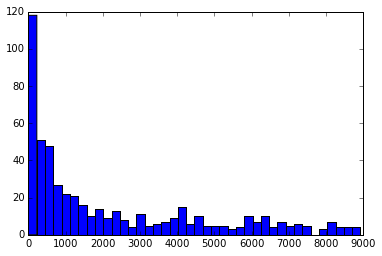

In [18]:
_max = 9000
_bins = 40
mod = [x for x in _times if x < _max]
_ = hist(mod, bins=_bins)

###Testing if Pareto distribution is a good fit###

$f(x) = \frac{a}{x^(a+1)} ,  1 < x < \infty $

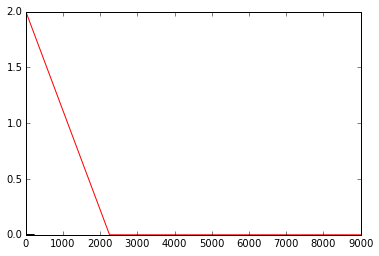

In [21]:
_ = hist(mod, bins=_bins, normed=True)
X = linspace(1, _max, 5)
Y = pareto(2)
_ = plot(X, Y.pdf(X), 'r-')

Clearly The pareto is not a proper fit for any a


In [23]:
tweetsk = get_tweets('kanyewest', 1000, True)

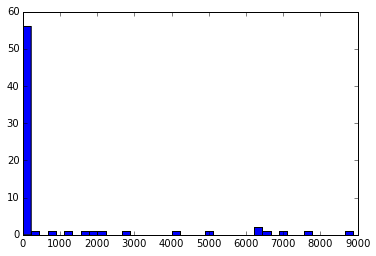

In [25]:
times = [t.created_at for t in tweetsk]
times.sort()
timedeltas = [(times[i+1]-times[i]).total_seconds() for i in range(len(times)-1)]
_times = []
for i in timedeltas:
    if i < 28800:
        _times.append(i)
_max = 9000
_bins = 40
mod = [x for x in _times if x < _max]
_ = hist(mod, bins=_bins)        